In [1]:
import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

import seaborn as sns

plt.style.use("default")  # it will keep all visualization clean

sns.set_context("notebook")  # it will tell seaborn library to adjust the size of the text and plot elements

In [2]:
data = pd.read_csv("Salary_Dataset_DSL_project.csv")

In [3]:
data

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [4]:
data.shape

(22770, 8)

In [5]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  str    
 2   Job Title          22770 non-null  str    
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  str    
 6   Employment Status  22770 non-null  str    
 7   Job Roles          22770 non-null  str    
dtypes: float64(1), int64(2), str(5)
memory usage: 1.4 MB


In [6]:
data.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [7]:
data.describe(include='all')

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
count,22770.000000,22769,22770,2.277000e+04,22770.000000,22770,22770,22770
unique,NaN,11260,1080,NaN,NaN,10,4,11
top,NaN,Tata Consultancy Services,Software Development Engineer,NaN,NaN,Bangalore,Full Time,SDE
freq,NaN,271,2351,NaN,NaN,8264,20083,8183
mean,3.918213,NaN,NaN,6.953872e+05,1.855775,NaN,NaN,NaN
std,0.519675,NaN,NaN,8.843990e+05,6.823668,NaN,NaN,NaN
min,1.000000,NaN,NaN,2.112000e+03,1.000000,NaN,NaN,NaN
25%,3.700000,NaN,NaN,3.000000e+05,1.000000,NaN,NaN,NaN
50%,3.900000,NaN,NaN,5.000000e+05,1.000000,NaN,NaN,NaN
75%,4.200000,NaN,NaN,9.000000e+05,1.000000,NaN,NaN,NaN


In [8]:
data.isnull().sum()

Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [9]:
data.drop_duplicates()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


# Outlier detection and removal

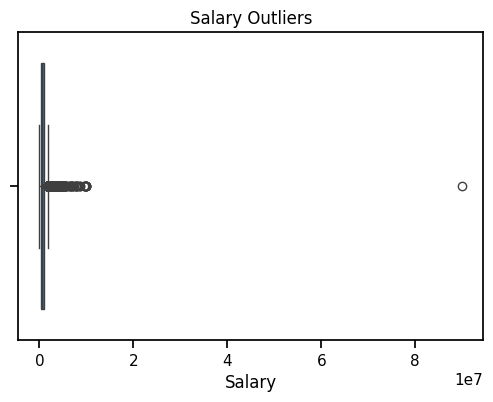

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x = data['Salary'])

plt.title("Salary Outliers")
plt.show()

IQR(Interquartile range) Method

In [11]:
Q1 = data['Salary'].quantile(0.25)

Q3 = data['Salary'].quantile(0.75)

IQR = Q3 - Q1

In [12]:
lower_limit = Q1 - 1.5 * IQR

upper_limit = Q3 + 1.5 * IQR

In [13]:
df = data[(data['Salary'] >= lower_limit) & (data['Salary'] <= upper_limit)]

In [14]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


# Univarate Analysis
* Salary Distribution

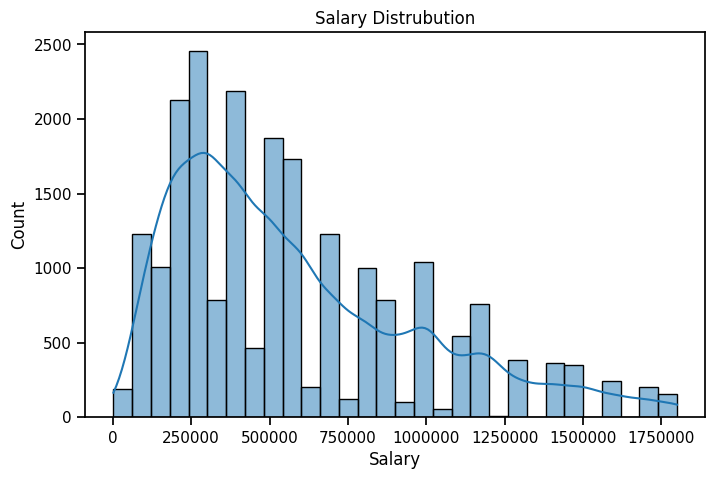

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Salary'],bins = 30,kde = True)

plt.ticklabel_format(style='plain',axis = 'x')  # it converts the value in readable form

plt.title("Salary Distrubution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

# Answering Business Questions
 Q1. Which job roles have highest salary ?

In [16]:
df['Job Roles'].nunique()

11

In [17]:
df['Job Roles'].unique()

<StringArray>
[ 'Android',  'Backend', 'Database', 'Frontend',      'IOS',     'Java',
   'Mobile',      'SDE',   'Python',      'Web',  'Testing']
Length: 11, dtype: str

In [18]:
df.groupby('Job Roles')["Salary"].mean().sort_values(ascending = False)

Job Roles
Database    745670.833333
SDE         693104.775386
Mobile      648251.121076
IOS         617741.013470
Backend     574203.926740
Frontend    532927.754789
Android     501886.106443
Java        493755.957895
Testing     474144.130006
Python      460101.327641
Web         395296.404040
Name: Salary, dtype: float64

In [19]:
df.head(10)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
5,4.2,Freelancer,Android Developer,100000,3,Bangalore,Full Time,Android
6,3.7,SQUARE N CUBE,Android Developer,192000,3,Bangalore,Full Time,Android
7,3.1,Samsung R&D Institute India - Bangalore,Android Developer,400000,3,Bangalore,Full Time,Android
8,3.7,DXMinds Technologies,Android Developer,300000,3,Bangalore,Full Time,Android
9,3.6,Endeavour Software Technologies,Android Developer,600000,3,Bangalore,Full Time,Android


In [22]:
plt.figure(figsize = (8,5))
job_salary.plot(kind = 'bar')
plt.title('Top 10 Job Roles by Average Salary')
plt.ylabel("Average Salary")
plt.show()

NameError: name 'job_salary' is not defined

<Figure size 800x500 with 0 Axes>